In [ ]:
from __future__ import print_function 
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D as Conv2D 
from keras.layers import MaxPooling2D
from keras.layers.advanced_activations import ELU 
import os

In [ ]:
num_classes = 20
img_rows, img_cols = 48, 48
batch_size = 16 
train_data_dir = r'C:\Users\hp\Documents\ml code\simpsons\train'
validation_data_dir = r'C:\Users\hp\Documents\ml code\simpsons\validation'

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

In [8]:
model = Sequential()

# First CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# First set of FC or Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second set of FC or Dense Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
activation_10 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)       

In [10]:
from keras.optimizers import RMSprop, SGD, Adam
 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 40

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/40
1221/1221 [==============================] - 4396s 4s/step - loss: 2.8682 - accuracy: 0.1650 - val_loss: 2.1043 - val_accuracy: 0.2316
Epoch 2/40
1221/1221 [==============================] - 4256s 3s/step - loss: 2.3506 - accuracy: 0.2827 - val_loss: 2.2974 - val_accuracy: 0.3326
Epoch 3/40
1221/1221 [==============================] - 4205s 3s/step - loss: 1.9310 - accuracy: 0.4125 - val_loss: 2.1536 - val_accuracy: 0.4969
Epoch 4/40
1221/1221 [==============================] - 4141s 3s/step - loss: 1.6128 - accuracy: 0.5107 - val_loss: 1.4644 - val_accuracy: 0.5308
Epoch 5/40
1221/1221 [==============================] - 4151s 3s/step - loss: 1.3751 - accuracy: 0.5912 - val_loss: 1.0413 - val_accuracy: 0.6283
Epoch 6/40
1221/1221 [==============================] - 4165s 3s/step - loss: 1.2888 - accuracy: 0.6253 - val_loss: 1.3921 - val_accuracy: 0.6992
Epoch 7/40
1221/1221 [==============================] - 4196s 3s/step - loss: 1.2213 - accuracy: 0.6479 - val_loss: 1.0008 -

In [ ]:
model.save("model.h5")

In [9]:
from __future__ import print_function 
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D as Conv2D 
from keras.layers import MaxPooling2D
from keras.layers.advanced_activations import ELU 
import os

num_classes = 20
img_rows, img_cols = 48, 48
batch_size = 16 
train_data_dir = r'C:\Users\hp\Documents\ml code\simpsons\train'
validation_data_dir = r'C:\Users\hp\Documents\ml code\simpsons\validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

model = keras.models.load_model('model.h5')


Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [10]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
activation_10 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)       

Found 990 images belonging to 20 classes.
Confusion Matrix
[[45  0  0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1 42  1  0  0  0  2  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  1 45  0  0  0  0  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  1  0 45  0  0  0  0  0  1  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 48  0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 48  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 48  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0  0 

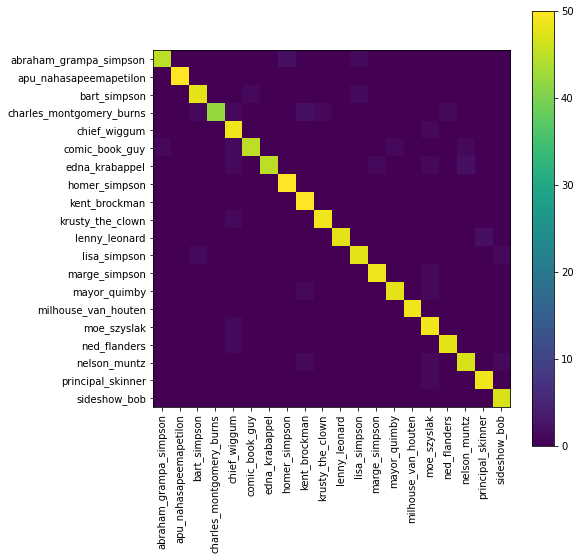

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)